## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

## Dataset

In [2]:
data = pd.read_csv('customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In this dataset, we have 7043 samples and 21 features columns. Following are the types of each columns.

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We have Customer ID in this dataset which would be of no use for modelling. So, We can drop this column. Moreover, we see TotalCharges column to be object type but it should be float type. So, We will now start exploring our data and do some feature engineering.

In [7]:
data.drop('customerID',axis='columns',inplace=True)

In [8]:
data['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [10]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have got some missing values in TotalCharges column. These are just 11 samples so, we can ignore them. Otherwise, We can use imputation methods to impute values.

In [11]:
data.dropna(subset=['TotalCharges'], inplace=True)

In [12]:
data.shape

(7032, 20)

Our target column has two values Yes or No. Whether a customer will an organization or not. We will see our tenure columns and interpret how long or an average customer is staying.

In [13]:
data_tenure_yes = data[data['Churn'] =='Yes'].tenure
data_tenure_no = data[data['Churn'] == 'No'].tenure
data_tenure_yes,data_tenure_no

(2        2
 4        2
 5        8
 8       28
 13      49
         ..
 7021    12
 7026     9
 7032     1
 7034    67
 7041     4
 Name: tenure, Length: 1869, dtype: int64, 0        1
 1       34
 3       45
 6       22
 7       10
         ..
 7037    72
 7038    24
 7039    72
 7040    11
 7042    66
 Name: tenure, Length: 5163, dtype: int64)

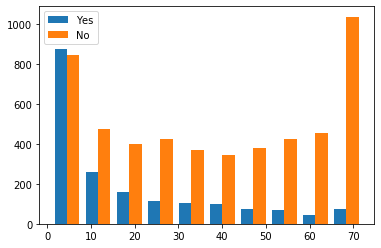

In [14]:
plotdata = [data_tenure_yes,data_tenure_no]
plt.hist(plotdata,label = ['Yes','No'])
plt.legend()
plt.show()

From this histogram, we can see that if a customer is staying for a long period of time. He is continuing to stay with them. There are a lot of people who left in the first year of joining.

In [15]:
data_monthly_yes = data[data['Churn'] =='Yes']['MonthlyCharges']
data_monthly_no = data[data['Churn'] == 'No']['MonthlyCharges']
data_monthly_yes,data_monthly_no

(2        53.85
 4        70.70
 5        99.65
 8       104.80
 13      103.70
          ...  
 7021     59.80
 7026     44.20
 7032     75.75
 7034    102.95
 7041     74.40
 Name: MonthlyCharges, Length: 1869, dtype: float64, 0        29.85
 1        56.95
 3        42.30
 6        89.10
 7        29.75
          ...  
 7037     21.15
 7038     84.80
 7039    103.20
 7040     29.60
 7042    105.65
 Name: MonthlyCharges, Length: 5163, dtype: float64)

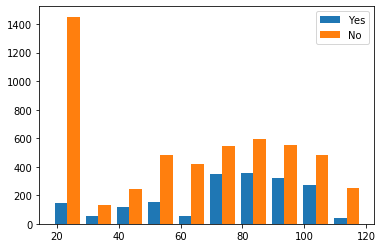

In [16]:
plotdatamonthly = [data_monthly_yes,data_monthly_no]
plt.hist(plotdatamonthly,label = ['Yes','No'])
plt.legend()
plt.show()

In [17]:
data_total_yes = data[data['Churn'] =='Yes']['TotalCharges']
data_total_no = data[data['Churn'] == 'No']['TotalCharges']
data_total_yes,data_total_no

(2        108.15
 4        151.65
 5        820.50
 8       3046.05
 13      5036.30
          ...   
 7021     727.80
 7026     403.35
 7032      75.75
 7034    6886.25
 7041     306.60
 Name: TotalCharges, Length: 1869, dtype: float64, 0         29.85
 1       1889.50
 3       1840.75
 6       1949.40
 7        301.90
          ...   
 7037    1419.40
 7038    1990.50
 7039    7362.90
 7040     346.45
 7042    6844.50
 Name: TotalCharges, Length: 5163, dtype: float64)

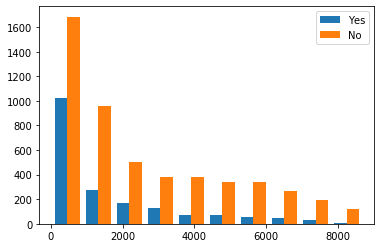

In [18]:
plotdatatotal = [data_total_yes,data_total_no]
plt.hist(plotdatatotal,label = ['Yes','No'])
plt.legend()
plt.show()

In [19]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We have some columns with values 'No Phone service' or 'No Internet service'. It actually means 'No'. So, we can replace these values with No. And, then can perform One Hot encoding.

In [20]:
data.replace('No phone service','No',inplace=True)

In [21]:
data.replace('No internet service','No',inplace=True)

In [22]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lb= LabelEncoder()

In [25]:
columns = []
for i in data.columns:
    print(i,data[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']


In [26]:
cat_cols = data.select_dtypes('object').columns

In [27]:
for i in cat_cols:
    if len(data[i].unique()) ==2: 
        data[i] = lb.fit_transform(data[i])

In [28]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [29]:
new_data = pd.get_dummies(data,columns=['InternetService','Contract','PaymentMethod'])

In [30]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [31]:
scale  = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()

In [32]:
new_data[scale] = mc.fit_transform(new_data[scale])

In [33]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [34]:
new_data.shape

(7032, 27)

In [35]:
X = new_data.drop('Churn',axis='columns')

In [36]:
Y = new_data['Churn']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=5)

In [38]:
X_train.shape

(5625, 26)

In [39]:
X_test.shape

(1407, 26)

In [40]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 861us/step - loss: 0.5007 - accuracy: 0.7444
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7963
Epoch 3/100
176/176 [==============================] - 0s 690us/step - loss: 0.4190 - accuracy: 0.8021
Epoch 4/100
176/176 [==============================] - 0s 668us/step - loss: 0.4141 - accuracy: 0.8085
Epoch 5/100
176/176 [==============================] - 0s 617us/step - loss: 0.4113 - accuracy: 0.8087
Epoch 6/100
176/176 [==============================] - 0s 660us/step - loss: 0.4082 - accuracy: 0.8084
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8107
Epoch 8/100
176/176 [==============================] - 0s 986us/step - loss: 0.4037 - accuracy: 0.8117
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8149
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4

176/176 [==============================] - 0s 792us/step - loss: 0.3584 - accuracy: 0.8297
Epoch 81/100
176/176 [==============================] - 0s 732us/step - loss: 0.3569 - accuracy: 0.8356
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8332
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8336
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8338
Epoch 85/100
176/176 [==============================] - 0s 669us/step - loss: 0.3558 - accuracy: 0.8292
Epoch 86/100
176/176 [==============================] - 0s 676us/step - loss: 0.3545 - accuracy: 0.8336
Epoch 87/100
176/176 [==============================] - 0s 788us/step - loss: 0.3545 - accuracy: 0.8332
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8322
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3540 - 

In [41]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 655us/step - loss: 0.4698 - accuracy: 0.7818


[0.46982309222221375, 0.7818052768707275]

In [42]:
y_pred = model.predict(X_test)
y_pred

array([[0.34011692],
       [0.52507246],
       [0.00873426],
       ...,
       [0.7583121 ],
       [0.6415251 ],
       [0.6426179 ]], dtype=float32)

In [43]:
def convert_values(values):
    y_pred = []
    for i in values:
        if i > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [44]:
y_pred = convert_values(y_pred)

In [45]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.53      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

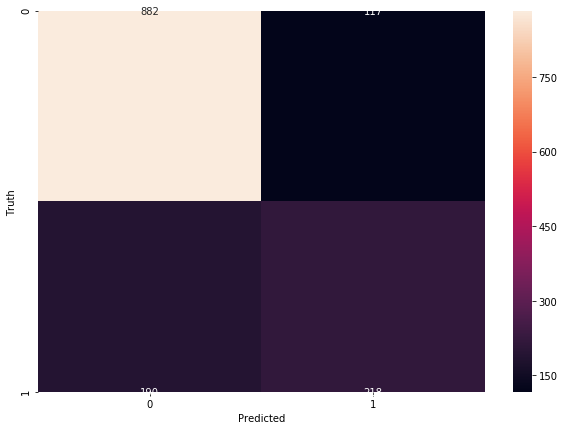

In [46]:
import seaborn as sn
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
cm

array([[882, 117],
       [190, 218]])

Trying out Dropout to improve performance on Test set.

In [48]:
modeld = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])


modeld.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

modeld.fit(X_train, Y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 661us/step - loss: 0.5065 - accuracy: 0.7438
Epoch 2/100
176/176 [==============================] - 0s 637us/step - loss: 0.4495 - accuracy: 0.7723
Epoch 3/100
176/176 [==============================] - 0s 671us/step - loss: 0.4457 - accuracy: 0.7840
Epoch 4/100
176/176 [==============================] - 0s 663us/step - loss: 0.4384 - accuracy: 0.7854
Epoch 5/100
176/176 [==============================] - 0s 816us/step - loss: 0.4342 - accuracy: 0.7915
Epoch 6/100
176/176 [==============================] - 0s 633us/step - loss: 0.4311 - accuracy: 0.7979
Epoch 7/100
176/176 [==============================] - 0s 643us/step - loss: 0.4254 - accuracy: 0.7988
Epoch 8/100
176/176 [==============================] - 0s 764us/step - loss: 0.4237 - accuracy: 0.7998
Epoch 9/100
176/176 [==============================] - 0s 819us/step - loss: 0.4228 - accuracy: 0.7993
Epoch 10/100
176/176 [==============================] - 0s 890us/step - l

176/176 [==============================] - 0s 643us/step - loss: 0.3799 - accuracy: 0.8228
Epoch 81/100
176/176 [==============================] - 0s 749us/step - loss: 0.3833 - accuracy: 0.8212
Epoch 82/100
176/176 [==============================] - 0s 842us/step - loss: 0.3833 - accuracy: 0.8224
Epoch 83/100
176/176 [==============================] - 0s 832us/step - loss: 0.3779 - accuracy: 0.8254
Epoch 84/100
176/176 [==============================] - 0s 686us/step - loss: 0.3834 - accuracy: 0.8215
Epoch 85/100
176/176 [==============================] - 0s 695us/step - loss: 0.3858 - accuracy: 0.8192
Epoch 86/100
176/176 [==============================] - 0s 667us/step - loss: 0.3801 - accuracy: 0.8304
Epoch 87/100
176/176 [==============================] - 0s 609us/step - loss: 0.3791 - accuracy: 0.8215
Epoch 88/100
176/176 [==============================] - 0s 603us/step - loss: 0.3795 - accuracy: 0.8263
Epoch 89/100
176/176 [==============================] - 0s 612us/step - loss:

In [49]:
modeld.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.7740


[0.4618297219276428, 0.7739872336387634]

In [50]:
y_predd = modeld.predict(X_test)
y_predd

array([[0.38572046],
       [0.44322282],
       [0.0048472 ],
       ...,
       [0.7393723 ],
       [0.68880296],
       [0.75985956]], dtype=float32)

In [51]:
y_predd = convert_values(y_predd)

In [52]:
print(classification_report(Y_test,y_predd))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       999
           1       0.64      0.50      0.56       408

    accuracy                           0.77      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.76      0.77      0.77      1407



We can see that accuracy is improved. There is slight increase in F1-score for both the classes. But, the F-1 score of class 1 is still not good as compared to class 0. We need to handle this imbalance dataset to improve our model. There are different ways to handle this such as 
- Undersampling your majority class
- Oversampling your minority classes by dulpication
- Using SMOTE (Synthetic Minority Over-Sampling Technique)
- Generate Synthetic examples using KNN method. 

There is another one way to handle this - Focal Loss. What Focal Loss is? It penalizes majority samples during loss calculation and give more weight to minority class samples. Lets see an implementation to overcome this situation.

## Undersampling

In [53]:
yes_class_data = new_data[new_data['Churn']==1]
no_class_data = new_data[new_data['Churn']==0]

In [54]:
yes_class_data.shape

(1869, 27)

In [55]:
no_class_data.shape

(5163, 27)

In [56]:
no_class_data_under = no_class_data.sample(yes_class_data.shape[0])

In [57]:
no_class_data_under.shape

(1869, 27)

As we can see that, now we have 1869 samples of class 0. We have reduced our number of samples from 5163 to 1869. We will combine these two datasets and build our model.

In [58]:
under_df = pd.concat([no_class_data_under,yes_class_data],axis=0)
under_df.shape

(3738, 27)

In [59]:
under_df['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [60]:
X_under = under_df.drop('Churn',axis='columns')
y_under = under_df['Churn']

In [61]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.2, random_state=15, stratify=y_under)

Here, we used stratify while splitting our data. What it does? It maintains the proportion of both the classes in training set as well as test set.

In [62]:
y_train_u.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [63]:
model_u = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model_u.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_u.fit(X_train_u, y_train_u, epochs=100)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.6629
Epoch 2/100
94/94 [==============================] - 0s 905us/step - loss: 0.5077 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 0s 685us/step - loss: 0.4866 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 727us/step - loss: 0.4834 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 946us/step - loss: 0.4798 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 641us/step - loss: 0.4772 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 621us/step - loss: 0.4745 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 0s 710us/step - loss: 0.4727 - accuracy: 0.7753
Epoch 10/100
94/94 [==============================] - 0s 727us/step - loss: 0.4724 - accuracy: 

94/94 [==============================] - 0s 654us/step - loss: 0.3856 - accuracy: 0.8264
Epoch 82/100
94/94 [==============================] - 0s 691us/step - loss: 0.3867 - accuracy: 0.8221
Epoch 83/100
94/94 [==============================] - 0s 708us/step - loss: 0.3859 - accuracy: 0.8304
Epoch 84/100
94/94 [==============================] - 0s 732us/step - loss: 0.3849 - accuracy: 0.8268
Epoch 85/100
94/94 [==============================] - 0s 727us/step - loss: 0.3843 - accuracy: 0.8274
Epoch 86/100
94/94 [==============================] - 0s 699us/step - loss: 0.3820 - accuracy: 0.8318
Epoch 87/100
94/94 [==============================] - 0s 714us/step - loss: 0.3823 - accuracy: 0.8281
Epoch 88/100
94/94 [==============================] - 0s 835us/step - loss: 0.3818 - accuracy: 0.8284
Epoch 89/100
94/94 [==============================] - 0s 854us/step - loss: 0.3800 - accuracy: 0.8244
Epoch 90/100
94/94 [==============================] - 0s 769us/step - loss: 0.3811 - accuracy: 

In [64]:
model_u.evaluate(X_test_u,y_test_u)

24/24 [==============================] - 0s 526us/step - loss: 0.6064 - accuracy: 0.7299


[0.6063751578330994, 0.7299465537071228]

In [65]:
y_pred_u = model_u.predict(X_test_u)
y_pred_u

array([[5.69502771e-01],
       [9.16280985e-01],
       [9.82213259e-01],
       [8.72887850e-01],
       [2.06746757e-01],
       [6.96271479e-01],
       [6.68895245e-03],
       [8.05474699e-01],
       [7.27444410e-01],
       [4.47303057e-04],
       [1.74296409e-01],
       [4.30803001e-02],
       [7.02690125e-01],
       [8.68397236e-01],
       [9.65484142e-01],
       [4.69100773e-01],
       [6.59387946e-01],
       [9.35799360e-01],
       [8.53783131e-01],
       [8.69271755e-02],
       [1.55554265e-01],
       [7.64794767e-01],
       [4.06174630e-01],
       [8.31016898e-03],
       [3.73745918e-01],
       [7.57412434e-01],
       [4.23133910e-01],
       [7.71952987e-01],
       [1.00314796e-01],
       [9.74593222e-01],
       [7.51814008e-01],
       [1.26952529e-02],
       [8.23615670e-01],
       [9.88930166e-01],
       [2.08509609e-05],
       [7.55804896e-01],
       [9.48675096e-01],
       [2.04900503e-02],
       [8.99712324e-01],
       [1.51101053e-02],


In [66]:
y_pred_u = convert_values(y_pred_u)

In [67]:
print(classification_report(y_test_u,y_pred_u))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       374
           1       0.73      0.74      0.73       374

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



Now, we can see the results. The F1-score for minority class 1 has improved Significantly. But, Score for class 0 got reduced because we reduced samples of this class and it is expected. So, We have more generalized classifier which classifies both classes with similar prediction score. Now, We will implement Oversampling method by generating duplicate samples.

## Oversampling

In [68]:
yes_class_data_over = yes_class_data.sample(no_class_data.shape[0],replace=True)
yes_class_data_over.shape

(5163, 27)

We have got more samples of class 1. Lets combine these two classes and implement our model.

In [69]:
over_df = pd.concat([no_class_data,yes_class_data_over],axis=0)
over_df.shape

(10326, 27)

In [70]:
over_df['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [71]:
X_o = over_df.drop('Churn',axis='columns')
y_o = over_df['Churn']

X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.2, random_state=15, stratify=y_o)

In [72]:
model_o = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model_o.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_o.fit(X_train_o, y_train_o, epochs=100)

Epoch 1/100
259/259 [==============================] - 0s 812us/step - loss: 0.5566 - accuracy: 0.7230
Epoch 2/100
259/259 [==============================] - 0s 752us/step - loss: 0.4876 - accuracy: 0.7663
Epoch 3/100
259/259 [==============================] - 0s 573us/step - loss: 0.4785 - accuracy: 0.7683
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7691
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7723
Epoch 6/100
259/259 [==============================] - 0s 649us/step - loss: 0.4690 - accuracy: 0.7755
Epoch 7/100
259/259 [==============================] - 0s 653us/step - loss: 0.4657 - accuracy: 0.7771
Epoch 8/100
259/259 [==============================] - 0s 730us/step - loss: 0.4634 - accuracy: 0.7774
Epoch 9/100
259/259 [==============================] - 0s 870us/step - loss: 0.4603 - accuracy: 0.7821
Epoch 10/100
259/259 [==============================] - 0s 772us/step - loss:

259/259 [==============================] - 0s 930us/step - loss: 0.3674 - accuracy: 0.8324
Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8378
Epoch 82/100
259/259 [==============================] - 0s 701us/step - loss: 0.3653 - accuracy: 0.8344
Epoch 83/100
259/259 [==============================] - 0s 717us/step - loss: 0.3635 - accuracy: 0.8362
Epoch 84/100
259/259 [==============================] - 0s 995us/step - loss: 0.3629 - accuracy: 0.8363
Epoch 85/100
259/259 [==============================] - 0s 852us/step - loss: 0.3623 - accuracy: 0.8361
Epoch 86/100
259/259 [==============================] - 0s 711us/step - loss: 0.3615 - accuracy: 0.8398
Epoch 87/100
259/259 [==============================] - 0s 683us/step - loss: 0.3602 - accuracy: 0.8393
Epoch 88/100
259/259 [==============================] - 0s 653us/step - loss: 0.3594 - accuracy: 0.8423
Epoch 89/100
259/259 [==============================] - 0s 673us/step - loss: 0

In [73]:
model_o.evaluate(X_test_o,y_test_o)

65/65 [==============================] - 0s 539us/step - loss: 0.4639 - accuracy: 0.7904


[0.46388959884643555, 0.7904162406921387]

In [74]:
y_pred_o = model_o.predict(X_test_o)
y_pred_o = convert_values(y_pred_o)
print(classification_report(y_test_o,y_pred_o))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1033
           1       0.76      0.84      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



We have got appoximately the same f1-score for both the classes. Our model is generalizing well. This is not actually a good method as it just copies the data and creates duplicate samples. Now, we will see another important and widely used technique to handle imabalanced dataset - SMOTE.

## SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, Y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [76]:
X_train_s,X_test_s,Y_train_s,Y_test_s = train_test_split(X_sm,y_sm, test_size=0.2,random_state=15,stratify=y_sm)

In [77]:
model_s = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model_s.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_s.fit(X_train_s, Y_train_s, epochs=100)

Epoch 1/100
259/259 [==============================] - 0s 622us/step - loss: 0.5234 - accuracy: 0.7479
Epoch 2/100
259/259 [==============================] - 0s 668us/step - loss: 0.4734 - accuracy: 0.7785
Epoch 3/100
259/259 [==============================] - 0s 647us/step - loss: 0.4638 - accuracy: 0.7806
Epoch 4/100
259/259 [==============================] - 0s 618us/step - loss: 0.4572 - accuracy: 0.7852
Epoch 5/100
259/259 [==============================] - 0s 604us/step - loss: 0.4514 - accuracy: 0.7904
Epoch 6/100
259/259 [==============================] - 0s 606us/step - loss: 0.4456 - accuracy: 0.7936
Epoch 7/100
259/259 [==============================] - 0s 598us/step - loss: 0.4406 - accuracy: 0.7983
Epoch 8/100
259/259 [==============================] - 0s 599us/step - loss: 0.4372 - accuracy: 0.7983
Epoch 9/100
259/259 [==============================] - 0s 598us/step - loss: 0.4333 - accuracy: 0.8036
Epoch 10/100
259/259 [==============================] - 0s 626us/step - l

Epoch 80/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8516
Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8477
Epoch 82/100
259/259 [==============================] - 0s 828us/step - loss: 0.3453 - accuracy: 0.8495
Epoch 83/100
259/259 [==============================] - 0s 851us/step - loss: 0.3453 - accuracy: 0.8501
Epoch 84/100
259/259 [==============================] - 0s 735us/step - loss: 0.3441 - accuracy: 0.8502
Epoch 85/100
259/259 [==============================] - 0s 711us/step - loss: 0.3449 - accuracy: 0.8528
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8500
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8500
Epoch 88/100
259/259 [==============================] - 0s 758us/step - loss: 0.3412 - accuracy: 0.8534
Epoch 89/100
259/259 [==============================] - 0s 769us/step - 

In [78]:
model_s.evaluate(X_test_s,Y_test_s)

65/65 [==============================] - 0s 601us/step - loss: 0.4381 - accuracy: 0.8025


[0.4381003677845001, 0.8025169372558594]

In [79]:
y_pred_s = model_s.predict(X_test_s)
y_pred_s = convert_values(y_pred_s)
print(classification_report(Y_test_s,y_pred_s))

              precision    recall  f1-score   support

           0       0.87      0.72      0.78      1033
           1       0.76      0.89      0.82      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



SMOTE is giving out the best results so far. Precision and recall for respective classes are consistent.

In [80]:
from focal_loss import BinaryFocalLoss

In [ ]:

model = tf.keras.Model(...)
model.compile(
    optimizer=...,
    loss=BinaryFocalLoss(gamma=2),  # Used here like a tf.keras loss
    metrics=...,
)
history = model.fit(...)

In [81]:
model_f = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model_f.compile(optimizer='adam',
              loss=BinaryFocalLoss(gamma=2),
              metrics=['accuracy'])

model_f.fit(X_train, Y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 838us/step - loss: 0.1222 - accuracy: 0.7682
Epoch 2/100
176/176 [==============================] - 0s 911us/step - loss: 0.1112 - accuracy: 0.7943
Epoch 3/100
176/176 [==============================] - 0s 800us/step - loss: 0.1091 - accuracy: 0.7979
Epoch 4/100
176/176 [==============================] - 0s 673us/step - loss: 0.1080 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 0s 662us/step - loss: 0.1069 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.8000
Epoch 7/100
176/176 [==============================] - 0s 970us/step - loss: 0.1061 - accuracy: 0.8039
Epoch 8/100
176/176 [==============================] - 0s 990us/step - loss: 0.1056 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 0s 896us/step - loss: 0.1045 - accuracy: 0.8103
Epoch 10/100
176/176 [==============================] - 0s 943us/step - los

176/176 [==============================] - 0s 722us/step - loss: 0.0872 - accuracy: 0.8329
Epoch 80/100
176/176 [==============================] - 0s 691us/step - loss: 0.0879 - accuracy: 0.8368
Epoch 81/100
176/176 [==============================] - 0s 900us/step - loss: 0.0866 - accuracy: 0.8338
Epoch 82/100
176/176 [==============================] - 0s 722us/step - loss: 0.0867 - accuracy: 0.8379
Epoch 83/100
176/176 [==============================] - 0s 766us/step - loss: 0.0864 - accuracy: 0.8380
Epoch 84/100
176/176 [==============================] - 0s 654us/step - loss: 0.0863 - accuracy: 0.8361
Epoch 85/100
176/176 [==============================] - 0s 644us/step - loss: 0.0866 - accuracy: 0.8334
Epoch 86/100
176/176 [==============================] - 0s 616us/step - loss: 0.0861 - accuracy: 0.8386
Epoch 87/100
176/176 [==============================] - 0s 681us/step - loss: 0.0862 - accuracy: 0.8382
Epoch 88/100
176/176 [==============================] - 0s 721us/step - loss:

In [82]:
model_f.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 821us/step - loss: 0.1431 - accuracy: 0.7662


[0.14313486218452454, 0.7661691308021545]

In [83]:
y_pred_f = model_f.predict(X_test)
y_pred_f = convert_values(y_pred_f)
print(classification_report(Y_test,y_pred_f))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       999
           1       0.59      0.63      0.61       408

    accuracy                           0.77      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.77      0.77      0.77      1407



We can see that the F-1 score is not as good as it is for class 0. Focal Loss is not helping much in overcoming the imbalanced datasets. It works effectively in Object detection where we errorneously identity objects in emply spaces.  

So, we can conclude that, SMOTE is very effective in handling imbalanced datasets as it generates synthetic data samples and prevents the problem of overfitting.